# COVID Detection Using Convolution Neural Network

### Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import keras
import tensorflow
from keras.models import Model
from keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten
from keras.models import Sequential
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from glob import glob

### Load the datasets

In [2]:
IMAGE_SIZE = [224, 224]
train_path = 'data/train'
test_path = 'data.test'
val_path = 'data/val'

In [3]:
train_path

'data/train'

### Image Preprocessing

In [4]:
train_data_gen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   validation_split=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True
                                   )
test_data_gen = ImageDataGenerator(rescale=1./255)
val_data_gen = ImageDataGenerator(rescale=1./255)

In [5]:
train_data = train_data_gen.flow_from_directory('data/train',
                                                 target_size=(64, 64),
                                                 batch_size=8,
                                                 class_mode='binary'
                                                 )

test_data = test_data_gen.flow_from_directory('data/test',
                                            target_size=(64, 64),
                                            batch_size=8,
                                            class_mode='binary'
                                            )

val_data = val_data_gen.flow_from_directory('data/val',
                                            target_size=(64, 64),
                                            batch_size=8,
                                            class_mode='binary'
                                           )

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [6]:
train_data.classes

array([0, 0, 0, ..., 1, 1, 1])

In [7]:
train_data.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

In [8]:
train_data.class_mode

'binary'

In [9]:
test_data.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

In [10]:
val_data.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

### Visualize the images

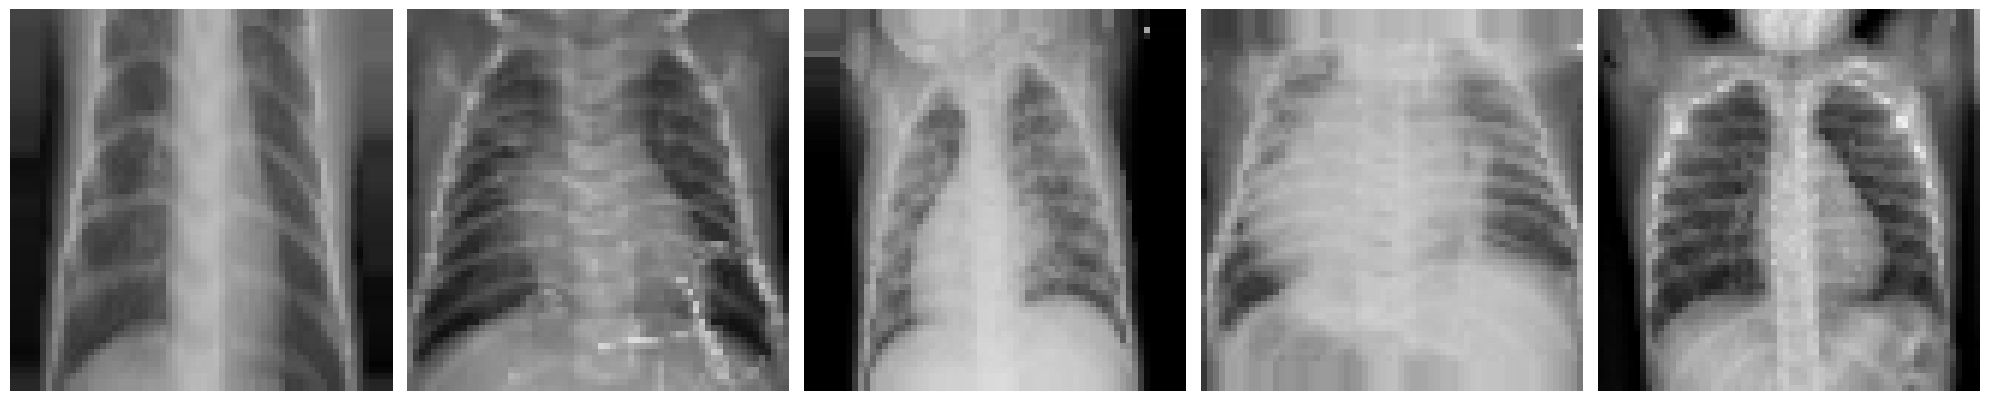

In [11]:
def plotImages(images):
    fig, axes = plt.subplots(1, 5, figsize=(20, 20))
    axes = axes.flatten()
    for img, ax in zip(images, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

training_images, _ = next(train_data)
plotImages(training_images[:5])

### Build CNN Model

In [12]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size= (3,3), activation='relu', input_shape=(64, 64, 3)))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D())

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(units=64,  activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(units=1, activation='sigmoid'))

#Train the model
model.compile( loss='binary_crossentropy', optimizer=keras.optimizers.Adam(learning_rate=1e-3), metrics=['accuracy'])

C:\anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
 model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 29, 29, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 12, 12, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 6, 6, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 4, 4, 64)            │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 2, 2, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 54,401 (212.50 KB)

 Trainable params: 54,401 (212.50 KB)

 Non-trainable params: 0 (0.00 B)

### Train the CNN model

In [14]:
callback = keras.callbacks.EarlyStopping(monitor='loss', patience=5)

history = model.fit(
    train_data,
    validation_data=test_data,
    epochs=20,
    #steps_per_epoch=len(train_data),
    steps_per_epoch=8,
    #validation_steps=len(test_data)
    validation_steps=2,
    callbacks= [callback]
)

Epoch 1/20


C:\anaconda\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


8/8 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step - accuracy: 0.6729 - loss: 0.6662 - val_accuracy: 0.6250 - val_loss: 0.6830
Epoch 2/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 496ms/step - accuracy: 0.8072 - loss: 0.5731 - val_accuracy: 0.8125 - val_loss: 0.5279
Epoch 3/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 568ms/step - accuracy: 0.8007 - loss: 0.5165 - val_accuracy: 0.6250 - val_loss: 0.7153
Epoch 4/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 725ms/step - accuracy: 0.8135 - loss: 0.5429 - val_accuracy: 0.8125 - val_loss: 0.4937
Epoch 5/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 589ms/step - accuracy: 0.7908 - loss: 0.5845 - val_accuracy: 0.8125 - val_loss: 0.5001
Epoch 6/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 487ms/step - accuracy: 0.6718 - loss: 0.6536 - val_accuracy: 0.6875 - val_loss: 0.6296
Epoch 7/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 559ms/step - accuracy: 0.6406 - loss: 0.7047 - val_accuracy: 0.6250 - val_loss: 0.6674
Epoch 8/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 532ms/step - accuracy: 0.8265 - loss: 0.5382 - val_accuracy: 0.7500 - val_loss: 0.5895


In [15]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

Text(0.5, 0, 'Epoch')

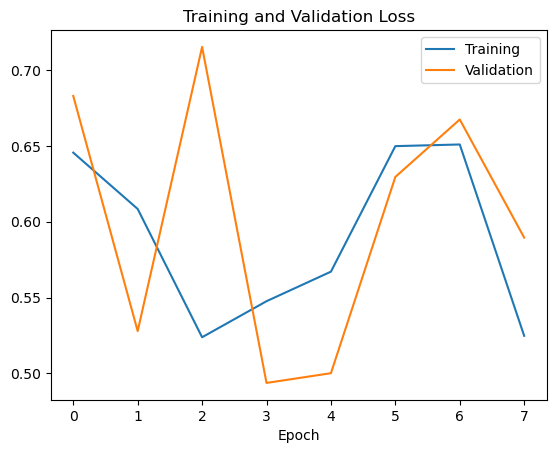

In [16]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training', 'Validation'])
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')

Text(0.5, 0, 'Epoch')

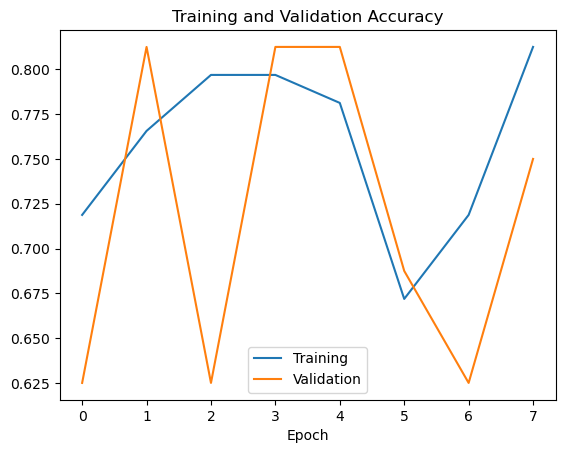

In [17]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Training', 'Validation'])
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')

In [18]:
test_loss, test_accuracy = model.evaluate(test_data)
print('Test Loss: {} Test Accuracy: {}'.format(test_loss, test_accuracy))

78/78 ━━━━━━━━━━━━━━━━━━━━ 70s 908ms/step - accuracy: 0.6126 - loss: 0.7501
Test Loss: 0.7312120795249939 Test Accuracy: 0.625


In [19]:
model.evaluate(test_data)

78/78 ━━━━━━━━━━━━━━━━━━━━ 16s 201ms/step - accuracy: 0.6140 - loss: 0.7455


[0.7312121391296387, 0.625]

### Model Prediction

In [20]:
#test_path = 'data.test'
path = 'data/test/NORMAL/IM-0011-0001.jpeg'
img = image.load_img(path, target_size=(64,64))

img = image.img_to_array(img)/255
img = np.array([img])
img.shape

(1, 64, 64, 3)

In [21]:
model.predict(img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


array([[0.7816964]], dtype=float32)

In [22]:
#test_path = 'data.test'
path = 'data/test/PNEUMONIA/person101_bacteria_484.jpeg'
img = image.load_img(path, target_size=(64, 64))

img = image.img_to_array(img)/255
img = np.array([img])
img.shape

model.predict(img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


array([[0.78690195]], dtype=float32)

In [23]:
#test_path = 'data.test'
path = 'data/val/PNEUMONIA/person1949_bacteria_4880.jpeg'
img = image.load_img(path, target_size=(64, 64))

img = image.img_to_array(img)/255
img = np.array([img])
img.shape

model.predict(img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


array([[0.777844]], dtype=float32)